# Relationship of Flight Characteristics on Flight Delay

## Investigation Overview

In this investigation, I want to look at the characteristics of flights that could be used to explain the related flight delays. The features that I am interested in are variables: year, month, day-of-week, delay causes, delay flights origin airports and destination airports.

## Dataset Overview

The data consisted of flights arrival delay and attributes of randomly selected 20,000 flight records from approximately 7 million records from 2007 and 7 million records from 2008. The attributes included the five causes of flights, as well as additional comparison information such as year, month, day of week, carrier and start and end airports. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from some output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')
conv_to_str=['index','year', 'day_of_week']
for col in conv_to_str:
    df_clean[col]=df_clean[col].astype(str)

## Brief View of Flight Delay in Total Flights
As the pie chart below, we can see that there are 50.92% of the total flights delayed, that's a big potion and in the range of the proportion, 24.13% of the delays are from 2008, and 26.79% of the delays are from 2007. So, when taking a flight, we'd better prepare to be patient. 

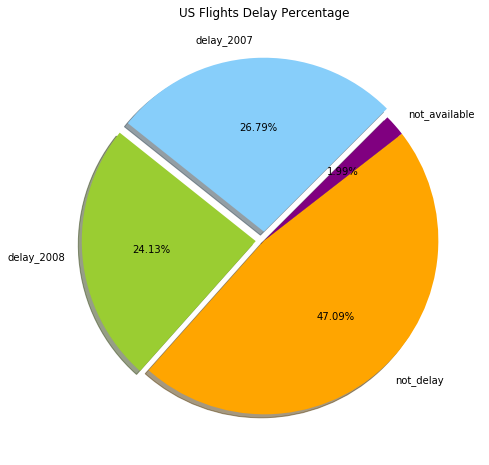

In [3]:
#dataset overview in a pie chart
val1=df_clean[(df_clean.arr_delay>0 )& (df_clean.year=='2007')].shape[0]/df_clean.shape[0]
val2=df_clean[(df_clean.arr_delay>0 )& (df_clean.year=='2008')].shape[0]/df_clean.shape[0]
val3=df_clean[df_clean.arr_delay<=0].shape[0]/df_clean.shape[0]
val4=df_clean[df_clean.arr_delay.isnull()].shape[0]/df_clean.shape[0]

value_list=[val1, val2, val3, val4]
label_list=['delay_2007', 'delay_2008','not_delay', 'not_available']
color_list=['lightskyblue','yellowgreen', 'orange', 'purple']
explode_list=[0.05, 0.05, 0, 0]
plt.figure(figsize=(8, 8))
plt.pie(value_list, shadow=True, labels=label_list, startangle=45, autopct='%.2f%%', colors=color_list, explode=explode_list)
plt.title('US Flights Delay Percentage')
plt.show()

## Distribution of Flight Delay in Minute
The histogram has a long tail on the right, and most of the data fall in the range from 0 to 200 minutes. In order to see the distribution more closely, I will plot the data using a log-scale.

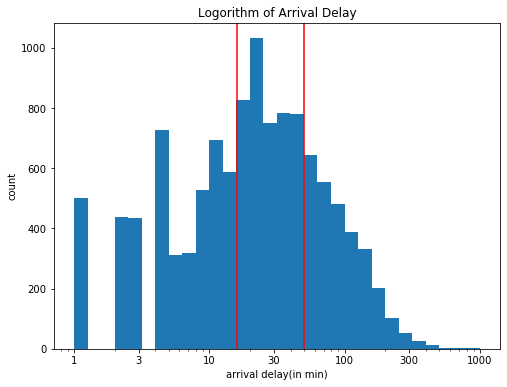

In [4]:
bin_edges = 10 ** np.arange(0, np.log10(df_clean.arr_delay.max())+0.1, 0.1);
plt.figure(figsize=(8,6));
plt.hist(data=df_clean, x='arr_delay', bins = bin_edges);
plt.title('Logorithm of Arrival Delay');
plt.ylabel('count');
plt.xlabel('arrival delay(in min)');
plt.xscale('log');
tick_locs = [1,3,10, 30, 100, 300, 1000];
plt.xticks(tick_locs, tick_locs);
line=[16,50]
for i in line:
    plt.axvline(x=i, color='red')

## Distribution of Features May Affect Arrival Delay

The attributes that may affect flights delay and I am interested in are the unique carrier, the day of week, the month and the delay causes. 
The distribution of the frequency below can help us better understand the relationship between the feature variables and target variable. 

In [5]:
mask=df_clean.arr_delay>0
delay_flight=df_clean[mask]

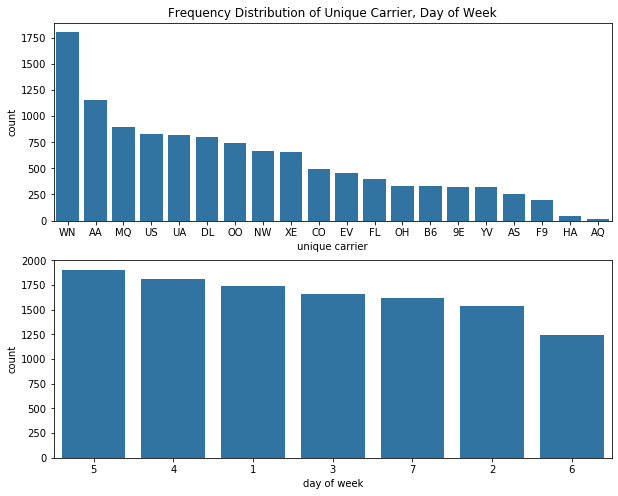

In [6]:
fig, ax = plt.subplots(nrows=2,figsize = [10,8]);
default_color = sb.color_palette()[0]

carrier_order=delay_flight.unique_carrier.value_counts().index
day_order=delay_flight.day_of_week.value_counts().index
sb.countplot(data = delay_flight, color=default_color,x = 'unique_carrier', order=carrier_order, ax = ax[0]);
ax[0].set_title('Frequency Distribution of Unique Carrier, Day of Week');
ax[0].set_xlabel('unique carrier');
sb.countplot(data = delay_flight, color=default_color,x = 'day_of_week',order=day_order, ax = ax[1]);
ax[1].set_xlabel('day of week');
plt.show();

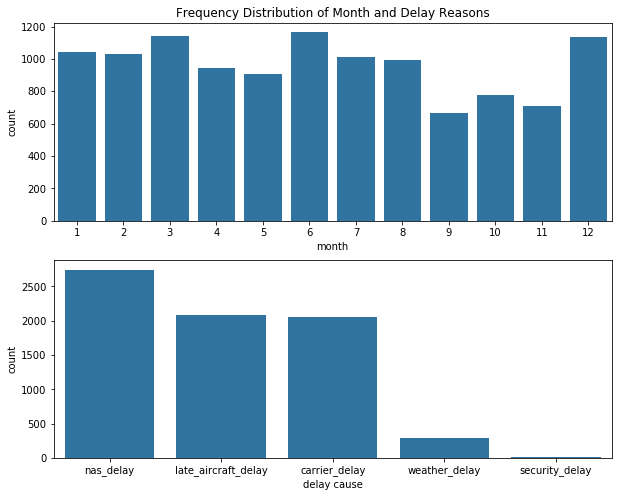

In [7]:
fig, ax = plt.subplots(nrows=2,figsize = [10,8]);
default_color = sb.color_palette()[0]

ax[0].set_title('Frequency Distribution of Month and Delay Reasons');
sb.countplot(data = delay_flight, color=default_color,x = 'month', ax = ax[0]);
ax[0].set_xlabel('month');
sb.countplot(data = delay_flight, color=default_color,x = 'delay_cause',ax = ax[1]);
ax[1].set_xlabel('delay cause');

plt.show();

## Average Arrival Delay Among Unique Carriers in Each Year
After compared the frequency of each feature against the target variable, I also try to compare the average of each feature against the target variable. From the pointplot below we can clearly compare the average delay among the unique carriers in each year. Compare each carrier with itself in different years, each carrier doesn't have big changes, but B6 has a very high average delay and F9, HA, AQ have the lowest average delay in minutes in each year. 

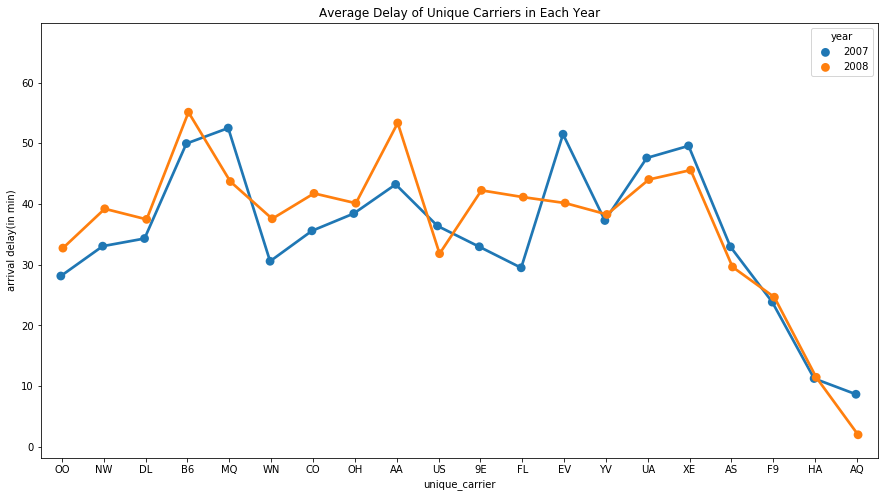

In [8]:
plt.figure(figsize=(15,8));
base_color = sb.color_palette()[0]
sb.pointplot(data = delay_flight, x = 'unique_carrier',  y = 'arr_delay',hue='year', errwidth=0, dodge=True);
plt.title('Average Delay of Unique Carriers in Each Year');
plt.ylabel('arrival delay(in min)');

## Arrival Delay and Delay Reason Weight in Each Month 
In this normalized scatter plot, we show the weight of the delay in minutes over each month. It is a scatter plot of the month and the number of arrival delay count, categorized by delay cause, and the level of the amount is shown in weight. This chart shows that considering of count, nas delay has the top count in each month, and the weather has the least count since security has a very small number, it is removed from this chart. 


In [9]:
delay_trans=delay_flight.groupby('month')['delay_cause'].value_counts()
delay_trans=pd.DataFrame(delay_trans, index=None)
delay_trans.columns=['count']
delay_trans.reset_index(inplace=True)
delay_trans=delay_trans.pivot(index='month', columns='delay_cause', values='count').reset_index().rename_axis(None, axis=1)
delay_trans

,month,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
0,1,185.0,155.0,270.0,1.0,30.0
1,2,187.0,204.0,242.0,1.0,29.0
2,3,216.0,214.0,287.0,3.0,31.0
3,4,157.0,169.0,236.0,NaN,12.0
4,5,133.0,153.0,211.0,3.0,20.0
5,6,223.0,227.0,290.0,3.0,38.0
6,7,167.0,193.0,248.0,NaN,44.0
7,8,195.0,198.0,219.0,1.0,26.0
8,9,117.0,88.0,117.0,1.0,8.0
9,10,125.0,130.0,185.0,1.0,12.0


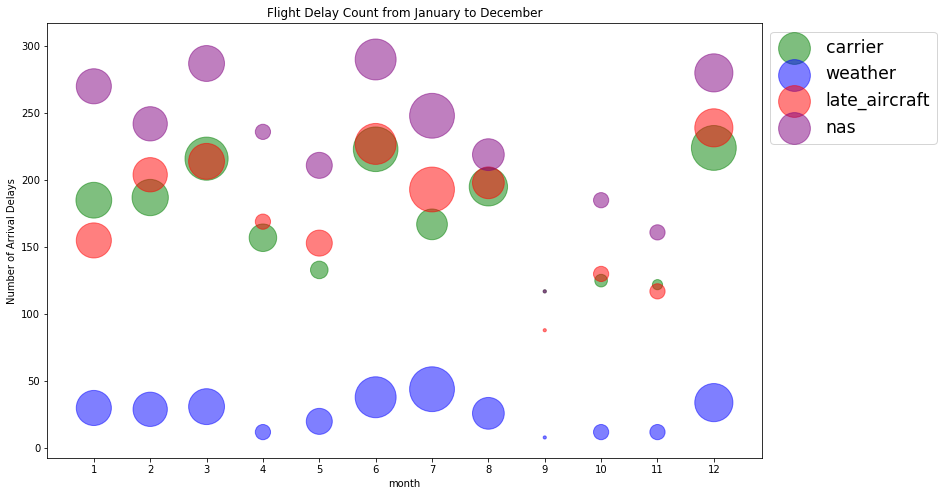

In [10]:
norm_carrier = (delay_trans['carrier_delay'] - delay_trans['carrier_delay'].min()) / (delay_trans['carrier_delay'].max() - delay_trans['carrier_delay'].min())
norm_weather = (delay_trans['weather_delay'] - delay_trans['weather_delay'].min()) / (delay_trans['weather_delay'].max() - delay_trans['weather_delay'].min())
norm_air = (delay_trans['late_aircraft_delay'] - delay_trans['late_aircraft_delay'].min()) / (delay_trans['late_aircraft_delay'].max() - delay_trans['late_aircraft_delay'].min())
norm_nas = (delay_trans['nas_delay'] - delay_trans['nas_delay'].min()) / (delay_trans['nas_delay'].max() - delay_trans['nas_delay'].min())
ax0 = delay_trans.plot(kind='scatter',x='month', y='carrier_delay',figsize=(16, 8), alpha=0.5, color='green',s=norm_carrier*2000+10,
                       xticks=np.arange(0,13,1))

ax1 = delay_trans.plot(kind='scatter',x='month',y='weather_delay',alpha=0.5,color="blue",s=norm_weather*2000+10,ax=ax0);
ax2 = delay_trans.plot(kind='scatter',x='month',y='late_aircraft_delay',alpha=0.5,color="red",s=norm_weather*2000+10,ax=ax0);
ax3 = delay_trans.plot(kind='scatter',x='month',y='nas_delay',alpha=0.5,color="purple",s=norm_weather * 2000+10,ax=ax0);

ax0.set_ylabel('Number of Arrival Delays');
ax0.set_title('Flight Delay Count from January to December');

# Shrink current axis's height by 20% on the width
box = ax0.get_position();
ax0.set_position([box.x0, box.y0, box.width*0.8, box.height]);
# Put a legend on the side of current axis
ax0.legend(['carrier', 'weather', 'late_aircraft','nas'],loc='upper left', bbox_to_anchor=(1, 1),fontsize='xx-large' );

## Average Delay By Year in Each Month 
For year 2007 and 2008, the mean of arrival delay of corresponding months are pretty close. We can see that the peaks are in June, July, and August, September usually shows a valley of arrival delay, and December is another peak. The variation of error width in June and December are also wider. 

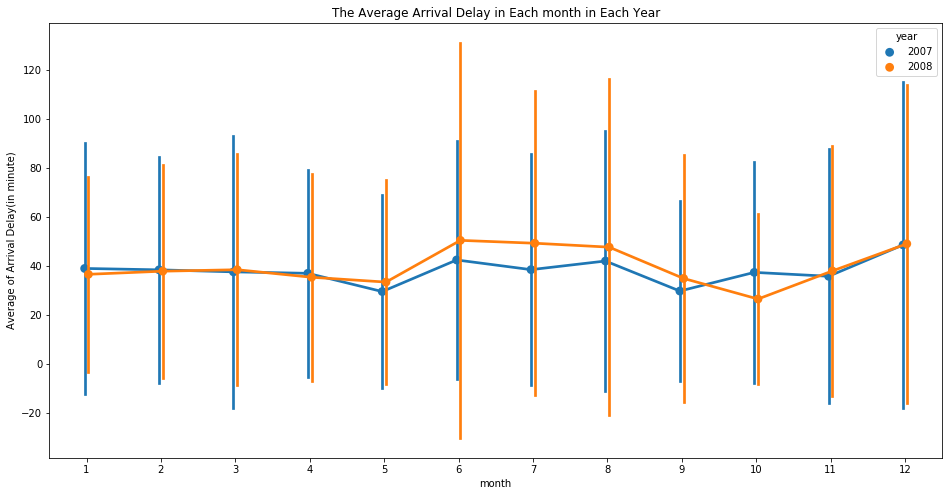

In [11]:
plt.figure(figsize=(16, 8));
sb.pointplot(data=delay_flight, x='month', y='arr_delay', hue='year', ci='sd', dodge=True);
plt.ylabel('Average of Arrival Delay(in minute)');
plt.title('The Average Arrival Delay in Each month in Each Year');

## Average Arrival Delay of Each Delay Cause in Each Month 
In the below point plot, we have variables of year, month, delay cause and the average of arrival delay in the same plot. We can compare the average arrival delay of the reasons in each year and in each month. In each year, the average delay of the flights was around 50 minutes. In 2007, the average security delay was the lowest among all, and weather caused high average delay in most months in the year,like March, April, May, June, August, October, December. In 2008, weather delay still had great effects on average delay, and caused higher average delay. 

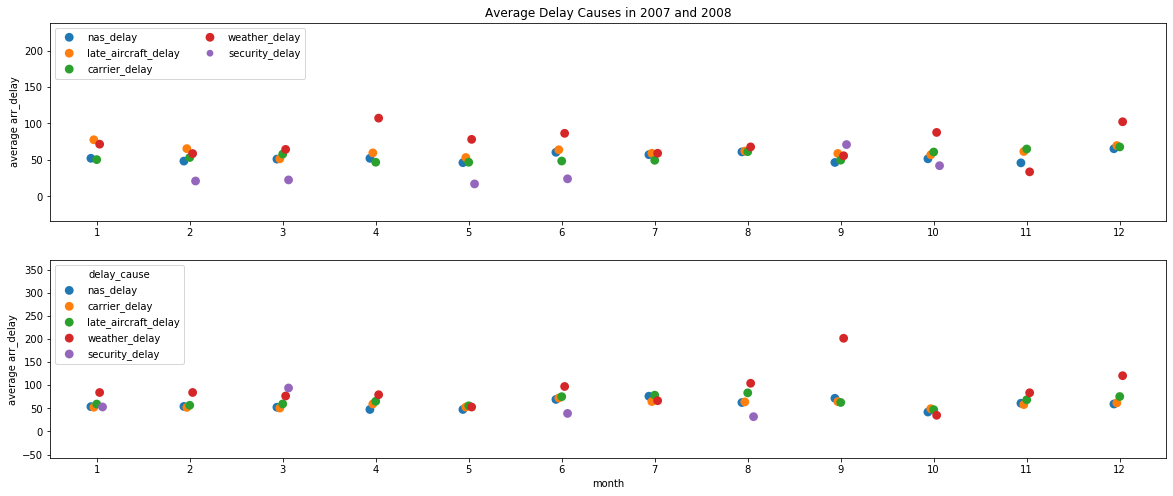

In [12]:
fig, ax = plt.subplots(nrows=2,figsize = [20,8]);

sb.pointplot(data=delay_flight[delay_flight.year=='2007'],x= 'month', y='arr_delay', 
             hue='delay_cause', ci='sd', dodge=True, linestyles=' ', errwidth=0, ax=ax[0]);
ax[0].set_ylabel('average arr_delay');
ax[0].set_xlabel(' ');
ax[0].set_title('Average Delay Causes in 2007 and 2008');
ax[0].legend(ncol=2);

sb.pointplot(data=delay_flight[delay_flight.year=='2008'],x= 'month', y='arr_delay', 
             hue='delay_cause', ci='sd', dodge=True, linestyles=' ', errwidth=0, ax = ax[1]);
plt.ylabel('average arr_delay');
plt.show();

In [ ]:
! jupyter nbconvert Project_7_Presentation.ipynb --to slides --post serve --template output_toggle